# Machine Learning - Supervised Learning a. Classification 
    • Project: Credit Risk Assessment 
        ○ Skills: Binary classification, model evaluation, handling imbalanced data
        ○ Tools: Scikit-learn, XGBoost, LightGBM


In [2]:
%pip install pandas
import pandas as pd

%pip install sklearn
from sklearn.model_selection import train_test_split

%pip install matplotlib
import matplotlib.pyplot as plt

%pip install imblearn
# Import the necessary libraries
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder
# Handling missing values using an imputer
from sklearn.impute import SimpleImputer


Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


|Feature Name	               |         Description                                |
|------------------------------|----------------------------------------------------|
|person_age	                   |         Age                                     
|person_income	               |         Annual Income
|person_home_ownership         |         Home ownership
|person_emp_length	           |         Employment length (in years)
|loan_intent	               |         Loan intent
|loan_amnt	                   |         Loan amount
|loan_int_rate	               |         Interest rate
|loan_status	               |         Loan status (0 is non default 1 is default)
|loan_percent_income	       |         Percent income
|cb_person_default_on_file	   |         Historical default
|cb_preson_cred_hist_length	   |         Credit history length

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
# Check missing values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# Handling missing values using an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'

# Apply imputer only on 'person_emp_length' and 'loan_int_rate' columns
df[['person_emp_length', 'loan_int_rate']] = pd.DataFrame(
    imputer.fit_transform(df[['person_emp_length', 'loan_int_rate']]), 
    columns=['person_emp_length', 'loan_int_rate'])


In [7]:
# Check missing values
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
# Cases with persone age above 100 years( very rare cases)
df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


In [9]:
# Checking groups in home ownership
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [10]:
# Incorrect employment length above 50 years
df[df['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [11]:
# Incorrect income, Above 2,000,000
df[df['person_income']>2000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,8450,12.29,0,0.0,Y,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.0,N,25


In [12]:
# Understanding cases of loan intent
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [13]:
# Understanding cases of loan status 
df['loan_status'].unique()

array([1, 0])

In [14]:
# Cases of cb_person_default_on_file
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [15]:
# removing cases above 100 years
df2 = df[df['person_age']<100]

# removing incorrect employment length
df3 = df2[df2['person_emp_length']<60]

# Remove incorrect income
df4 = df3[df3['person_income']<2000000]

In [16]:
df4.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


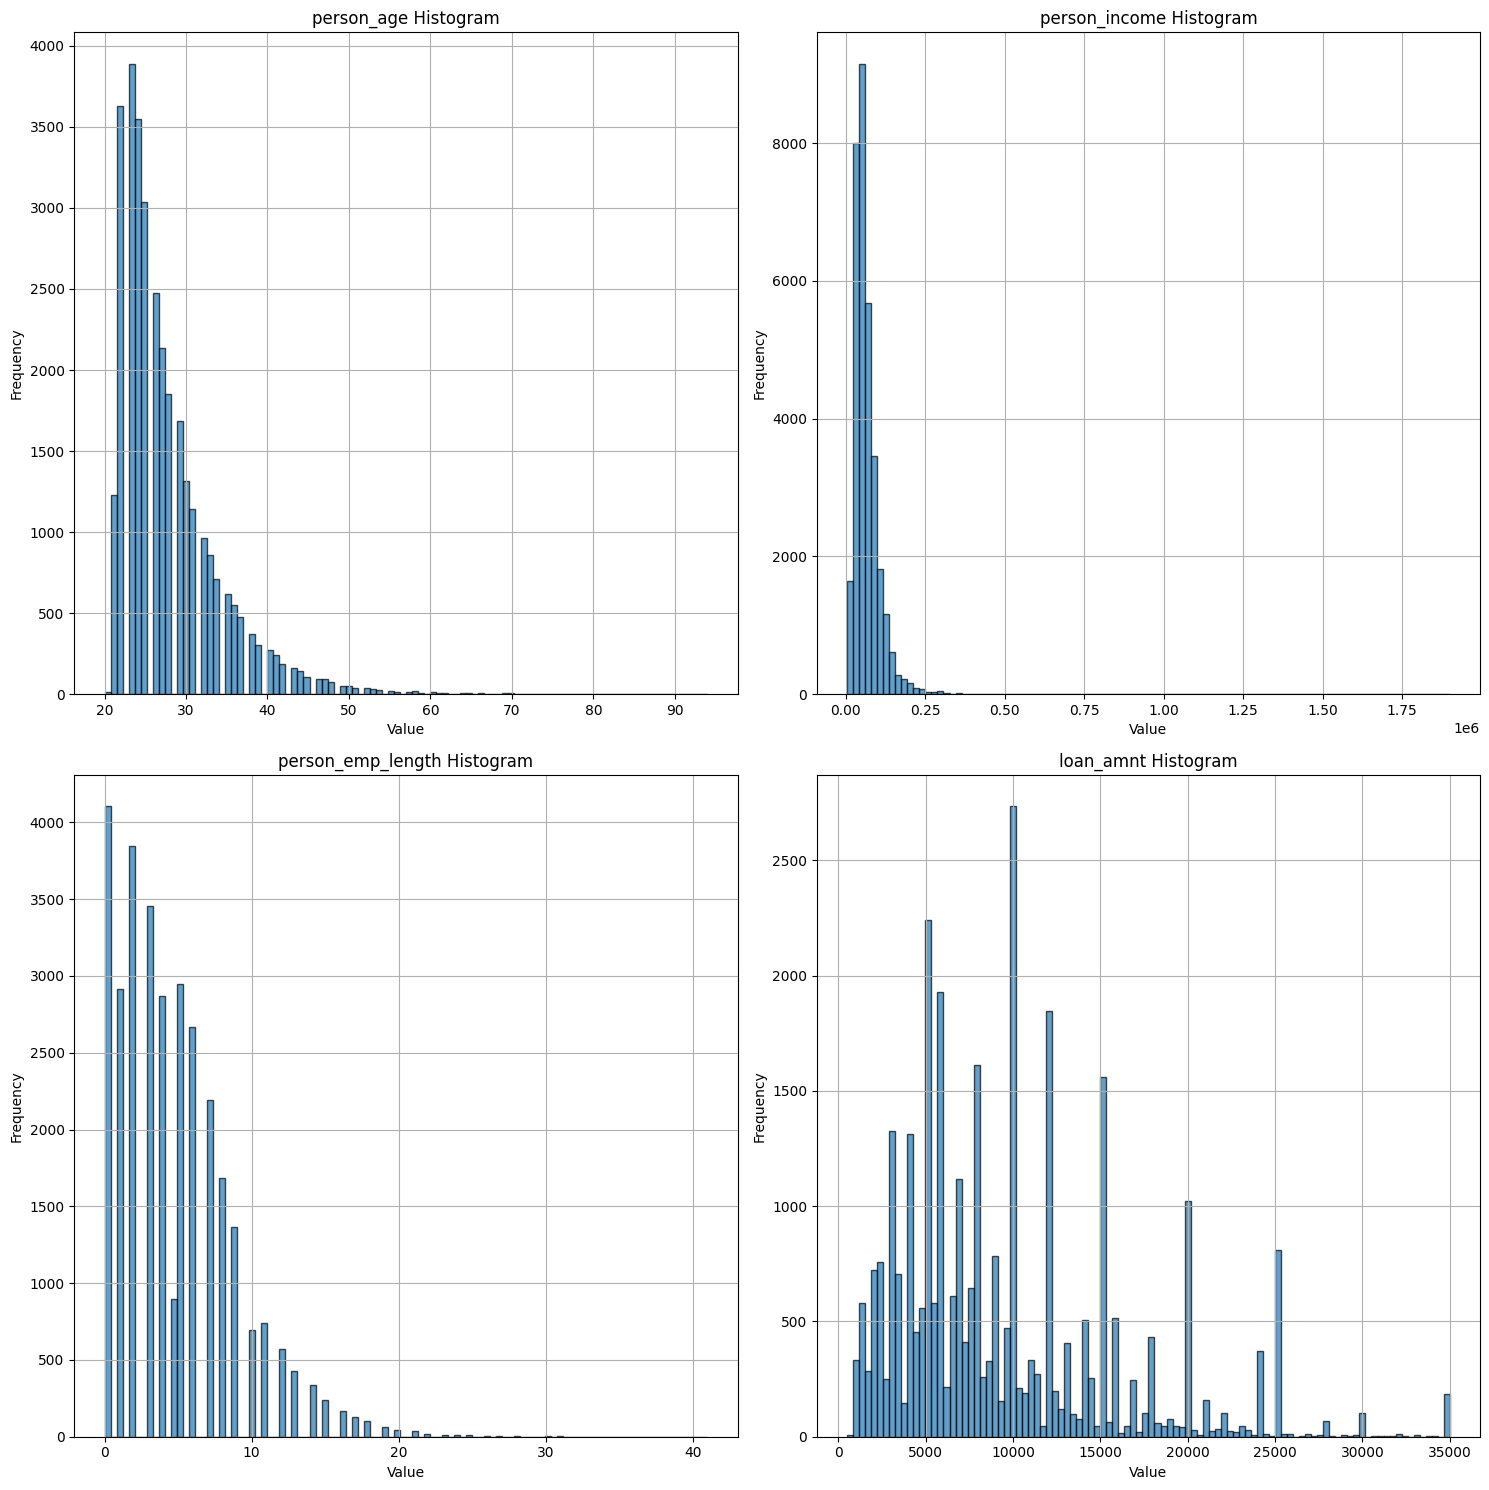

In [17]:
# --- Subplots ---
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# First subplot: Histogram for 'person_age'
axs[0, 0].hist(df4['person_age'], bins=100, edgecolor='black', alpha=0.7)
axs[0, 0].set_title('person_age Histogram')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

# Second subplot: Histogram for 'person_income'
axs[0, 1].hist(df4['person_income'], bins=100, edgecolor='black', alpha=0.7)
axs[0, 1].set_title('person_income Histogram')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Third subplot: You can plot another relevant variable, e.g., 'person_emp_length'
axs[1, 0].hist(df4['person_emp_length'], bins=100, edgecolor='black', alpha=0.7)
axs[1, 0].set_title('person_emp_length Histogram')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Fourth subplot: Another variable, e.g., 'loan_amnt'
axs[1, 1].hist(df4['loan_amnt'], bins=100, edgecolor='black', alpha=0.7)
axs[1, 1].set_title('loan_amnt Histogram')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


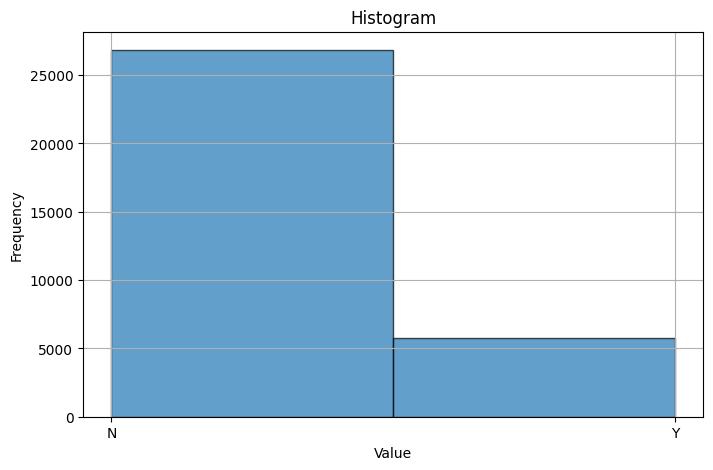

In [18]:
# looking at cb_person_default_on_file
plt.figure(figsize=(8, 5))
plt.hist(df4['cb_person_default_on_file'], bins=2, edgecolor='black', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
# Count rows where cb_person_default_on_file == 'Y'
count_Y = df4[df4['cb_person_default_on_file'] == 'Y'].shape[0]

# Count rows where cb_person_default_on_file == 'N'
count_N = df4[df4['cb_person_default_on_file'] == 'N'].shape[0]

print(f"Number of rows with 'Y': {count_Y}")
print(f"Number of rows with 'N': {count_N}")


Number of rows with 'Y': 5743
Number of rows with 'N': 26830


This shows imbalance data. To deal with the imbalance data, we need to use:
- Metrics like Percision, Recall,F1 Score
- Over sampling or under sampling


### Over sampling the 'Y': 5627 Class
Random Oversampling: Randomly duplicate examples in the minority class.
In the first step we need to split data into train and test and then over sample train data to avoid ddata leakage. 
Almost all feature engineering like standardization, Normalisation etc should be done after the train test split.
Here is order of things:
1. Train and Test Split
2. One-Hot-Encoding
3. Over samoling of train data 

1. Train and Test Split

In [20]:
# Split Data into X and Y
X = df4.drop('cb_person_default_on_file', axis =1)
Y = df4['cb_person_default_on_file'] # traget variable

In [21]:
#Split The data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle=True, test_size= 0.2)

In [22]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
32363,52,85000,RENT,1.0,DEBTCONSOLIDATION,11000,12.420000,0,0.13,25
10515,26,52700,MORTGAGE,3.0,MEDICAL,7500,13.800000,1,0.12,2
17173,23,24000,RENT,0.0,PERSONAL,6000,11.011695,0,0.25,3
13789,26,96000,MORTGAGE,4.0,VENTURE,11625,10.000000,0,0.12,3
8594,22,24000,RENT,0.0,EDUCATION,8000,11.011695,1,0.33,2


In [23]:
print(f"Number train data set: {X_train.shape[0]}")
print(f"Number test data set: {X_test.shape[0]}")

Number train data set: 26058
Number test data set: 6515


2. One-Hot-Encoding

In [24]:
# One-hot encode the categorical variables in X_train and X_test
# We specify `sparse=False` to return a dense array
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform on train data
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[['person_home_ownership', 'loan_intent']]), 
                               columns=encoder.get_feature_names_out())

# Transform test data (without fitting again)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[['person_home_ownership', 'loan_intent']]), 
                              columns=encoder.get_feature_names_out())

# Drop original columns and concatenate encoded ones
X_train = X_train.drop(columns=['person_home_ownership', 'loan_intent']).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

X_test = X_test.drop(columns=['person_home_ownership', 'loan_intent']).reset_index(drop=True)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [25]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,52,85000,1.0,11000,12.420000,0,0.13,25,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,26,52700,3.0,7500,13.800000,1,0.12,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,23,24000,0.0,6000,11.011695,0,0.25,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26,96000,4.0,11625,10.000000,0,0.12,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,24000,0.0,8000,11.011695,1,0.33,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,36,39996,1.0,5700,7.29,0,0.14,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,35,100000,0.0,5000,7.74,0,0.05,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24,100000,8.0,13000,11.48,0,0.13,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,23,62000,0.0,10000,14.27,0,0.16,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,108000,11.0,25000,14.96,1,0.23,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Convert Y_train and Y_test from 'Y'/'N' to 1/0
Y_train = Y_train.map({'Y': 1, 'N': 0}).reset_index(drop=True)
Y_test = Y_test.map({'Y': 1, 'N': 0}).reset_index(drop=True)

In [28]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
26053    1
26054    1
26055    0
26056    0
26057    1
Name: cb_person_default_on_file, Length: 26058, dtype: int64


To apply oversampling using SMOTE (Synthetic Minority Over-sampling Technique) on X_train and Y_train, you'll need to ensure that the categorical variables have been encoded and that SMOTE is applied only to the training set. SMOTE works by creating synthetic examples for the minority class, but it only works with numerical data.

In [29]:
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)

# Ensure X_train is in numerical format 
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [30]:
# Number of data in each category after over sampling
sum(Y_train_resampled==1), sum(Y_train_resampled==0)

(21483, 21483)

Now our train data set is ready for modeling. I will be using Logistic regression, Random Forest and XGBoost for classification. I'll be comparing F1 score, AUC and False negative rate which is imporatnt for credit risk default. Note that regularization is applied by default. L2 is the default

Logistic Rgeression

In [ ]:
from sklearn.linear_model import LogisticRegression
